# notes

1. Had to use nightly build of pudl db cos stable build did not have core_eia860__scd_generators_energy_storage table
2. Later report entries have null values
3. 

In [1]:
import pandas as pd
import sqlite3

In [2]:
# mapping of columns in the Excel sheets to the PUDL database

gen_cols_mapping = [
    'plant_code', # -> plant_id_eia
    'plant_name', # -> plant_name_eia
    'generator_id',
    'operating_year', # -> generator_operating_date
    'nameplate_capacity_mw', # -> capacity_mw
    'summer_capacity_mw',
    'winter_capacity_mw',
    'minimum_load_mw',
    'energy_source_1', # -> energy_source_code_1
    'technology', # -> technology_description
    'status', # -> operational_status_code
    'prime_mover', # -> prime_mover_code
    'operating_month', # -> generator_operating_date
    'operating_year', # -> generator_operating_date
    'planned_retirement_month', # -> planned_generator_retirement_date
    'planned_retirement_year', # -> planned_generator_retirement_date
    'state',
    ]

storage_cols_mapping = [
    'plant_code', # -> plant_id_eia
    'generator_id',
    'nameplate_energy_capacity_mwh', # -> energy_storage_capacity_mwh
    'maximum_charge_rate_mw', # -> max_charge_rate_mw
    'maximum_discharge_rate_mw', # -> max_discharge_rate_mw
    'storage_technology_1'] # -> storage_technology_code_1

locs_cols_mapping = [
    'plant_code', # -> plant_id_eia
    'nerc_region',
    'balancing_authority_code', # -> balancing_authority_code_eia
    'latitude',
    'longitude']

con = sqlite3.connect("/home/stephen/Downloads/pudl.sqlite(1)/pudl.sqlite")

cur = con.cursor()

res = cur.execute("""SELECT m.name as tableName,
       p.name as columnName
FROM sqlite_master m
left outer join pragma_table_info((m.name)) p
     on m.name <> p.name
order by tableName, columnName""")

table_cols = res.fetchall()



In [56]:
eia_data_operable = pd.read_sql_query(
    """
    SELECT
        core_eia860__scd_generators.plant_id_eia,
        _out_eia__yearly_generators.plant_name_eia,
        core_eia860__scd_generators.generator_id,
        core_eia860__scd_generators.capacity_mw,
        core_eia860__scd_generators.summer_capacity_mw,
        core_eia860__scd_generators.winter_capacity_mw,
        core_eia860__scd_generators.minimum_load_mw,
        core_eia860__scd_generators.energy_source_code_1,
        core_eia860__scd_generators.technology_description,
        core_eia860__scd_generators.operational_status_code,
        core_eia860__scd_generators.prime_mover_code,
        core_eia860__scd_generators.planned_generator_retirement_date,
        core_eia860__scd_generators.energy_storage_capacity_mwh,
        _out_eia__yearly_generators.generator_operating_date,
        core_eia860__scd_generators_energy_storage.max_charge_rate_mw,
        core_eia860__scd_generators_energy_storage.max_discharge_rate_mw,
        core_eia860__scd_generators_energy_storage.storage_technology_code_1,
        core_eia860__scd_plants.nerc_region,
        core_eia860__scd_plants.balancing_authority_code_eia,
        _out_eia__yearly_generators.state,
        _out_eia__yearly_generators.latitude,
        _out_eia__yearly_generators.longitude
    FROM core_eia860__scd_generators
    INNER JOIN _out_eia__yearly_generators ON core_eia860__scd_generators.plant_id_eia = _out_eia__yearly_generators.plant_id_eia AND core_eia860__scd_generators.generator_id = _out_eia__yearly_generators.generator_id
    INNER JOIN core_eia860__scd_generators_energy_storage ON core_eia860__scd_generators.plant_id_eia = core_eia860__scd_generators_energy_storage.plant_id_eia AND core_eia860__scd_generators.generator_id = core_eia860__scd_generators_energy_storage.generator_id
    INNER JOIN core_eia860__scd_plants ON core_eia860__scd_generators.plant_id_eia = core_eia860__scd_plants.plant_id_eia
    GROUP BY core_eia860__scd_generators.plant_id_eia, core_eia860__scd_generators.generator_id
    HAVING MAX(core_eia860__scd_generators.report_date)
    ORDER BY core_eia860__scd_generators.report_date DESC
    """,
    con,
)


In [57]:
eia_data_operable


,plant_id_eia,plant_name_eia,generator_id,capacity_mw,summer_capacity_mw,winter_capacity_mw,minimum_load_mw,energy_source_code_1,technology_description,operational_status_code,...,energy_storage_capacity_mwh,generator_operating_date,max_charge_rate_mw,max_discharge_rate_mw,storage_technology_code_1,nerc_region,balancing_authority_code_eia,state,latitude,longitude
0,141,Agua Fria,AFSB1,25.0,25.0,25.0,None,MWH,Batteries,OP,...,100.0,2021-09-01,25.0,25.0,LIB,WSCC,None,AZ,33.556099,-112.215302
1,260,Moss Landing,BAT1,300.0,300.0,300.0,None,MWH,Batteries,OP,...,1200.0,2021-05-01,300.0,300.0,LIB,WSCC,None,CA,36.804836,-121.782242
2,260,Moss Landing,BAT2,100.0,100.0,100.0,None,MWH,Batteries,OP,...,400.0,2021-05-01,100.0,100.0,LIB,WSCC,None,CA,36.804836,-121.782242
3,389,El Centro,BESS,30.0,18.9,29.0,None,MWH,Batteries,OP,...,20.0,2016-10-01,30.0,30.0,LIB,WSCC,None,CA,32.802223,-115.540001
4,645,Big Bend,BESS1,12.6,12.6,12.6,None,MWH,Batteries,OP,...,25.2,2017-02-01,12.6,12.6,LIB,FRCC,None,FL,27.794399,-82.403603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,60650,Mission Rock Energy Center Hybrid,BA1,25.0,25.0,25.0,None,MWH,Batteries,CN,...,NaN,None,NaN,NaN,None,WECC,CISO,CA,34.308731,-119.106697
517,58291,Tehachapi Spindle,TS1,20.0,20.0,20.0,None,MWH,Flywheels,CN,...,NaN,None,NaN,NaN,None,WECC,None,CA,35.046112,-118.194725
518,60646,Energy Nuevo Storage Farm,NUEVO,20.0,20.0,20.0,None,MWH,Flywheels,CN,...,NaN,None,NaN,NaN,None,WECC,CISO,CA,36.702038,-119.883003
519,60946,Santa Paula Energy Storage,SPES1,5.0,5.0,5.0,None,MWH,Batteries,CN,...,NaN,None,NaN,NaN,None,WECC,CISO,CA,34.346825,-119.055016


In [50]:
prev_generators = [{'plant_code': 141.0, 'generator_id': 'AFSB1'},
 {'plant_code': 260.0, 'generator_id': 'BAT1'},
 {'plant_code': 260.0, 'generator_id': 'BAT2'},
 {'plant_code': 389.0, 'generator_id': 'BESS'},
 {'plant_code': 645.0, 'generator_id': 'BESS1'},
 {'plant_code': 792.0, 'generator_id': 'BAT1'},
 {'plant_code': 990.0, 'generator_id': 'BAT1'},
 {'plant_code': 1016.0, 'generator_id': '11'},
 {'plant_code': 1507.0, 'generator_id': 'BESS'},
 {'plant_code': 1615.0, 'generator_id': '20'},
 {'plant_code': 1682.0, 'generator_id': 'BS1'},
 {'plant_code': 2830.0, 'generator_id': 'BECK1'},
 {'plant_code': 2830.0, 'generator_id': 'BECK2'},
 {'plant_code': 6304.0, 'generator_id': 'ES1'},
 {'plant_code': 6377.0, 'generator_id': 'BAT'},
 {'plant_code': 6704.0, 'generator_id': 'NASB1'},
 {'plant_code': 7063.0, 'generator_id': '1'},
 {'plant_code': 8063.0, 'generator_id': 'BESS'},
 {'plant_code': 50300.0, 'generator_id': 'BESS1'},
 {'plant_code': 54134.0, 'generator_id': 'BES1'},
 {'plant_code': 54134.0, 'generator_id': 'BES2'},
 {'plant_code': 54296.0, 'generator_id': 'BATT'},
 {'plant_code': 55370.0, 'generator_id': 'BGM'},
 {'plant_code': 56472.0, 'generator_id': 'BA1'},
 {'plant_code': 56475.0, 'generator_id': 'BA1'},
 {'plant_code': 56961.0, 'generator_id': 'BATT'},
 {'plant_code': 56981.0, 'generator_id': 'PYRBT'},
 {'plant_code': 56984.0, 'generator_id': 'INABT'},
 {'plant_code': 57045.0, 'generator_id': '2'},
 {'plant_code': 57082.0, 'generator_id': '2'},
 {'plant_code': 57206.0, 'generator_id': '3'},
 {'plant_code': 57242.0, 'generator_id': '2'},
 {'plant_code': 57325.0, 'generator_id': 'BFT'},
 {'plant_code': 57447.0, 'generator_id': '2'},
 {'plant_code': 57583.0, 'generator_id': 'BESS'},
 {'plant_code': 57584.0, 'generator_id': 'BS1'},
 {'plant_code': 57710.0, 'generator_id': 'SRS1'},
 {'plant_code': 57716.0, 'generator_id': 'HRS1'},
 {'plant_code': 57996.0, 'generator_id': 'AWEB'},
 {'plant_code': 58236.0, 'generator_id': 'BESS1'},
 {'plant_code': 58405.0, 'generator_id': '1'},
 {'plant_code': 58462.0, 'generator_id': 'MCST1'},
 {'plant_code': 58475.0, 'generator_id': 'BOU'},
 {'plant_code': 58585.0, 'generator_id': 'BESS'},
 {'plant_code': 58625.0, 'generator_id': 'SRJBA'},
 {'plant_code': 58899.0, 'generator_id': 'GEN-2'},
 {'plant_code': 59150.0, 'generator_id': 'BESS1'},
 {'plant_code': 59296.0, 'generator_id': 'NWO-B'},
 {'plant_code': 59772.0, 'generator_id': '1'},
 {'plant_code': 59817.0, 'generator_id': 'BATT1'},
 {'plant_code': 59939.0, 'generator_id': 'BESS1'},
 {'plant_code': 59939.0, 'generator_id': 'BESS2'},
 {'plant_code': 59949.0, 'generator_id': 'BESS1'},
 {'plant_code': 59957.0, 'generator_id': 'GIVB'},
 {'plant_code': 59957.0, 'generator_id': 'GRES'},
 {'plant_code': 59993.0, 'generator_id': 'BA'},
 {'plant_code': 60014.0, 'generator_id': 'BMS'},
 {'plant_code': 60016.0, 'generator_id': 'A'},
 {'plant_code': 60016.0, 'generator_id': 'B'},
 {'plant_code': 60061.0, 'generator_id': 'BA'},
 {'plant_code': 60092.0, 'generator_id': 'BLST2'},
 {'plant_code': 60093.0, 'generator_id': 'BES1'},
 {'plant_code': 60094.0, 'generator_id': 'BLST3'},
 {'plant_code': 60123.0, 'generator_id': 'BAT1'},
 {'plant_code': 60231.0, 'generator_id': 'BA1'},
 {'plant_code': 60233.0, 'generator_id': 'BESS1'},
 {'plant_code': 60233.0, 'generator_id': 'BESS2'},
 {'plant_code': 60249.0, 'generator_id': 'BES'},
 {'plant_code': 60297.0, 'generator_id': '1'},
 {'plant_code': 60299.0, 'generator_id': 'MIN02'},
 {'plant_code': 60390.0, 'generator_id': 'BRES'},
 {'plant_code': 60441.0, 'generator_id': 'SSPC'},
 {'plant_code': 60444.0, 'generator_id': 'GLA'},
 {'plant_code': 60491.0, 'generator_id': 'SB3BS'},
 {'plant_code': 60506.0, 'generator_id': 'BOB'},
 {'plant_code': 60518.0, 'generator_id': 'BA1'},
 {'plant_code': 60546.0, 'generator_id': 'BA1'},
 {'plant_code': 60562.0, 'generator_id': 'GMPBP'},
 {'plant_code': 60563.0, 'generator_id': 'FESS'},
 {'plant_code': 60565.0, 'generator_id': 'SES1'},
 {'plant_code': 60565.0, 'generator_id': 'SES2'},
 {'plant_code': 60566.0, 'generator_id': 'SES2'},
 {'plant_code': 60567.0, 'generator_id': 'SES1'},
 {'plant_code': 60567.0, 'generator_id': 'SES2'},
 {'plant_code': 60568.0, 'generator_id': 'SES'},
 {'plant_code': 60569.0, 'generator_id': 'SES'},
 {'plant_code': 60570.0, 'generator_id': 'SES'},
 {'plant_code': 60607.0, 'generator_id': 'BA1'},
 {'plant_code': 60609.0, 'generator_id': 'BA1'},
 {'plant_code': 60641.0, 'generator_id': 'HDES1'},
 {'plant_code': 60649.0, 'generator_id': '1'},
 {'plant_code': 60654.0, 'generator_id': 'GEN02'},
 {'plant_code': 60656.0, 'generator_id': 'MCH1'},
 {'plant_code': 60660.0, 'generator_id': 'WBU'},
 {'plant_code': 60661.0, 'generator_id': '013A'},
 {'plant_code': 60661.0, 'generator_id': '013B'},
 {'plant_code': 60690.0, 'generator_id': 'WBSS'},
 {'plant_code': 60698.0, 'generator_id': 'BESS1'},
 {'plant_code': 60698.0, 'generator_id': 'BESS2'},
 {'plant_code': 60699.0, 'generator_id': 'DESI1'},
 {'plant_code': 60760.0, 'generator_id': 'PE101'},
 {'plant_code': 60815.0, 'generator_id': 'BA1'},
 {'plant_code': 60815.0, 'generator_id': 'BA2'},
 {'plant_code': 60906.0, 'generator_id': 'BA1'},
 {'plant_code': 60959.0, 'generator_id': 'BA1'},
 {'plant_code': 60974.0, 'generator_id': '2BESS'},
 {'plant_code': 60996.0, 'generator_id': 'BA1'},
 {'plant_code': 61068.0, 'generator_id': 'LAWA2'},
 {'plant_code': 61098.0, 'generator_id': 'BMBS'},
 {'plant_code': 61107.0, 'generator_id': 'VRF'},
 {'plant_code': 61197.0, 'generator_id': 'PIMA'},
 {'plant_code': 61204.0, 'generator_id': 'ALMTS'},
 {'plant_code': 61334.0, 'generator_id': 'VRSA2'},
 {'plant_code': 61362.0, 'generator_id': 'ECBS'},
 {'plant_code': 61366.0, 'generator_id': 'TGES'},
 {'plant_code': 61431.0, 'generator_id': 'BCNB1'},
 {'plant_code': 61439.0, 'generator_id': 'PANBS'},
 {'plant_code': 61473.0, 'generator_id': 'BA1'},
 {'plant_code': 61647.0, 'generator_id': 'NOSPB'},
 {'plant_code': 61661.0, 'generator_id': 'VISTA'},
 {'plant_code': 61678.0, 'generator_id': 'BA1'},
 {'plant_code': 61679.0, 'generator_id': '1'},
 {'plant_code': 61721.0, 'generator_id': 'WLA01'},
 {'plant_code': 61722.0, 'generator_id': 'IRV01'},
 {'plant_code': 61722.0, 'generator_id': 'IRV1W'},
 {'plant_code': 61723.0, 'generator_id': 'IRV06'},
 {'plant_code': 61723.0, 'generator_id': 'IRV2W'},
 {'plant_code': 61730.0, 'generator_id': '61730'},
 {'plant_code': 61737.0, 'generator_id': 'GEN5'},
 {'plant_code': 61739.0, 'generator_id': 'SYR1'},
 {'plant_code': 61741.0, 'generator_id': 'KBESS'},
 {'plant_code': 61742.0, 'generator_id': 'GEN1'},
 {'plant_code': 61742.0, 'generator_id': 'GEN2'},
 {'plant_code': 61763.0, 'generator_id': '2'},
 {'plant_code': 61795.0, 'generator_id': '12649'},
 {'plant_code': 61861.0, 'generator_id': 'SRP'},
 {'plant_code': 61891.0, 'generator_id': 'EDGRD'},
 {'plant_code': 61892.0, 'generator_id': 'PLMST'},
 {'plant_code': 61901.0, 'generator_id': 'BA'},
 {'plant_code': 61909.0, 'generator_id': 'PKVWB'},
 {'plant_code': 61913.0, 'generator_id': 'B1'},
 {'plant_code': 61923.0, 'generator_id': 'VACUA'},
 {'plant_code': 61925.0, 'generator_id': 'CMNMB'},
 {'plant_code': 61956.0, 'generator_id': 'TBESS'},
 {'plant_code': 61990.0, 'generator_id': 'BA'},
 {'plant_code': 61993.0, 'generator_id': 'GDCBA'},
 {'plant_code': 61995.0, 'generator_id': 'UCMBA'},
 {'plant_code': 62027.0, 'generator_id': 'BAT1'},
 {'plant_code': 62147.0, 'generator_id': 'KNY1'},
 {'plant_code': 62175.0, 'generator_id': 'DIBLO'},
 {'plant_code': 62219.0, 'generator_id': 'AMLPB'},
 {'plant_code': 62257.0, 'generator_id': 'ESS1'},
 {'plant_code': 62373.0, 'generator_id': 'I25BA'},
 {'plant_code': 62381.0, 'generator_id': 'GMPBM'},
 {'plant_code': 62382.0, 'generator_id': 'GMPBF'},
 {'plant_code': 62383.0, 'generator_id': 'GMPBE'},
 {'plant_code': 62441.0, 'generator_id': 'U1'},
 {'plant_code': 62444.0, 'generator_id': 'BMY'},
 {'plant_code': 62460.0, 'generator_id': 'DESI2'},
 {'plant_code': 62490.0, 'generator_id': '2'},
 {'plant_code': 62497.0, 'generator_id': 'OCES2'},
 {'plant_code': 62499.0, 'generator_id': 'OCES3'},
 {'plant_code': 62564.0, 'generator_id': 'ELKHO'},
 {'plant_code': 62569.0, 'generator_id': 'ES1'},
 {'plant_code': 62585.0, 'generator_id': 'WAKFD'},
 {'plant_code': 62604.0, 'generator_id': 'OCESS'},
 {'plant_code': 62609.0, 'generator_id': 'BA1'},
 {'plant_code': 62617.0, 'generator_id': 'SEABT'},
 {'plant_code': 62644.0, 'generator_id': 'MMES'},
 {'plant_code': 62652.0, 'generator_id': 'HHESS'},
 {'plant_code': 62682.0, 'generator_id': 'FAYEB'},
 {'plant_code': 62683.0, 'generator_id': 'FAYWB'},
 {'plant_code': 62695.0, 'generator_id': 'NSES'},
 {'plant_code': 62714.0, 'generator_id': 'BESS1'},
 {'plant_code': 62733.0, 'generator_id': 'BEH'},
 {'plant_code': 62734.0, 'generator_id': 'BME'},
 {'plant_code': 62745.0, 'generator_id': 'BTRY'},
 {'plant_code': 62753.0, 'generator_id': 'BESS'},
 {'plant_code': 62754.0, 'generator_id': 'BA'},
 {'plant_code': 62801.0, 'generator_id': 'ORN34'},
 {'plant_code': 62835.0, 'generator_id': 'ESS-1'},
 {'plant_code': 62835.0, 'generator_id': 'ESS-2'},
 {'plant_code': 62839.0, 'generator_id': 'ESS98'},
 {'plant_code': 62856.0, 'generator_id': 'MBSS'},
 {'plant_code': 62862.0, 'generator_id': 'ES1'},
 {'plant_code': 62874.0, 'generator_id': 'ACOR1'},
 {'plant_code': 62875.0, 'generator_id': 'WILD1'},
 {'plant_code': 62889.0, 'generator_id': 'HEGJF'},
 {'plant_code': 62889.0, 'generator_id': 'HJFII'},
 {'plant_code': 62907.0, 'generator_id': 'VEC'},
 {'plant_code': 62908.0, 'generator_id': 'BA'},
 {'plant_code': 62937.0, 'generator_id': 'BA'},
 {'plant_code': 62968.0, 'generator_id': 'SYTKB'},
 {'plant_code': 62969.0, 'generator_id': 'SYP1B'},
 {'plant_code': 62970.0, 'generator_id': 'SYP2B'},
 {'plant_code': 62972.0, 'generator_id': 'SYLEB'},
 {'plant_code': 62973.0, 'generator_id': 'SYHAB'},
 {'plant_code': 62975.0, 'generator_id': 'SYBLB'},
 {'plant_code': 62976.0, 'generator_id': 'SYNOB'},
 {'plant_code': 62977.0, 'generator_id': 'SYN1B'},
 {'plant_code': 62978.0, 'generator_id': 'SYN2B'},
 {'plant_code': 62981.0, 'generator_id': 'BESS'},
 {'plant_code': 62999.0, 'generator_id': 'BESS'},
 {'plant_code': 63000.0, 'generator_id': 'BESS'},
 {'plant_code': 63011.0, 'generator_id': 'BESS'},
 {'plant_code': 63022.0, 'generator_id': '1'},
 {'plant_code': 63044.0, 'generator_id': 'BESS'},
 {'plant_code': 63064.0, 'generator_id': 'ES1'},
 {'plant_code': 63090.0, 'generator_id': 'COOPR'},
 {'plant_code': 63091.0, 'generator_id': '18027'},
 {'plant_code': 63186.0, 'generator_id': 'IMESS'},
 {'plant_code': 63214.0, 'generator_id': 'MDB02'},
 {'plant_code': 63255.0, 'generator_id': '2WPBA'},
 {'plant_code': 63264.0, 'generator_id': 'BATT'},
 {'plant_code': 63280.0, 'generator_id': 'BESS'},
 {'plant_code': 63324.0, 'generator_id': 'ES1'},
 {'plant_code': 63337.0, 'generator_id': '14320'},
 {'plant_code': 63338.0, 'generator_id': '4788'},
 {'plant_code': 63340.0, 'generator_id': '20660'},
 {'plant_code': 63341.0, 'generator_id': '20660'},
 {'plant_code': 63398.0, 'generator_id': 'AMBAT'},
 {'plant_code': 63415.0, 'generator_id': 'BATT'},
 {'plant_code': 63420.0, 'generator_id': 'BA903'},
 {'plant_code': 63421.0, 'generator_id': 'BA291'},
 {'plant_code': 63422.0, 'generator_id': 'BA112'},
 {'plant_code': 63458.0, 'generator_id': 'RUSHE'},
 {'plant_code': 63468.0, 'generator_id': 'BATT'},
 {'plant_code': 63469.0, 'generator_id': 'BATT'},
 {'plant_code': 63470.0, 'generator_id': 'BATT'},
 {'plant_code': 63472.0, 'generator_id': 'BATT'},
 {'plant_code': 63473.0, 'generator_id': 'BATT'},
 {'plant_code': 63474.0, 'generator_id': 'BATT'},
 {'plant_code': 63475.0, 'generator_id': 'BATT'},
 {'plant_code': 63486.0, 'generator_id': 'DA04B'},
 {'plant_code': 63510.0, 'generator_id': 'ST1'},
 {'plant_code': 63522.0, 'generator_id': 'HPBAT'},
 {'plant_code': 63535.0, 'generator_id': 'TEST'},
 {'plant_code': 63585.0, 'generator_id': 'NY3'},
 {'plant_code': 63609.0, 'generator_id': 'ALRGN'},
 {'plant_code': 63610.0, 'generator_id': 'BAKER'},
 {'plant_code': 63611.0, 'generator_id': 'CSULB'},
 {'plant_code': 63612.0, 'generator_id': 'DATS0'},
 {'plant_code': 63613.0, 'generator_id': 'DOWNY'},
 {'plant_code': 63614.0, 'generator_id': 'LAWRP'},
 {'plant_code': 63615.0, 'generator_id': 'LBCON'},
 {'plant_code': 63616.0, 'generator_id': 'OCSD1'},
 {'plant_code': 63617.0, 'generator_id': 'SOCCD'},
 {'plant_code': 63685.0, 'generator_id': 'LUNA'},
 {'plant_code': 63721.0, 'generator_id': 'CSBAT'},
 {'plant_code': 63722.0, 'generator_id': 'BA1'},
 {'plant_code': 63727.0, 'generator_id': 'SLB3C'},
 {'plant_code': 63727.0, 'generator_id': 'SLBES'},
 {'plant_code': 63727.0, 'generator_id': 'SLBPW'},
 {'plant_code': 63727.0, 'generator_id': 'SLBSV'},
 {'plant_code': 63728.0, 'generator_id': 'BESS'},
 {'plant_code': 63735.0, 'generator_id': 'SLV01'},
 {'plant_code': 63737.0, 'generator_id': 'CHS01'},
 {'plant_code': 63763.0, 'generator_id': 'ATES'},
 {'plant_code': 63774.0, 'generator_id': 'KISCB'},
 {'plant_code': 63775.0, 'generator_id': 'BESS1'},
 {'plant_code': 63804.0, 'generator_id': 'PBESS'},
 {'plant_code': 63805.0, 'generator_id': 'WBESS'},
 {'plant_code': 63834.0, 'generator_id': 'GTWAY'},
 {'plant_code': 63843.0, 'generator_id': 'SASP1'},
 {'plant_code': 63891.0, 'generator_id': 'SATCY'},
 {'plant_code': 63892.0, 'generator_id': 'LILYB'},
 {'plant_code': 63905.0, 'generator_id': 'ASKYB'},
 {'plant_code': 63913.0, 'generator_id': 'DODGB'},
 {'plant_code': 63930.0, 'generator_id': 'CF60'},
 {'plant_code': 63943.0, 'generator_id': '61730'},
 {'plant_code': 63995.0, 'generator_id': 'ES1'},
 {'plant_code': 63996.0, 'generator_id': 'ES1'},
 {'plant_code': 63998.0, 'generator_id': 'ES1'},
 {'plant_code': 63999.0, 'generator_id': 'ES1'},
 {'plant_code': 64000.0, 'generator_id': 'BESS'},
 {'plant_code': 64084.0, 'generator_id': 'BR1S'},
 {'plant_code': 64087.0, 'generator_id': 'BR2S'},
 {'plant_code': 64090.0, 'generator_id': 'NR12S'},
 {'plant_code': 64092.0, 'generator_id': 'GLSS'},
 {'plant_code': 64103.0, 'generator_id': 'DH003'},
 {'plant_code': 64105.0, 'generator_id': 'MAV04'},
 {'plant_code': 64128.0, 'generator_id': 'WPRB'},
 {'plant_code': 64129.0, 'generator_id': 'EBARB'},
 {'plant_code': 64140.0, 'generator_id': 'BESS'},
 {'plant_code': 64147.0, 'generator_id': 'DRAES'},
 {'plant_code': 64148.0, 'generator_id': 'FISHB'},
 {'plant_code': 64170.0, 'generator_id': 'MBES'},
 {'plant_code': 64182.0, 'generator_id': 'DRAES'},
 {'plant_code': 64185.0, 'generator_id': 'DRAES'},
 {'plant_code': 64187.0, 'generator_id': 'DRAES'},
 {'plant_code': 64198.0, 'generator_id': 'HRBE'},
 {'plant_code': 64207.0, 'generator_id': 'ES1'},
 {'plant_code': 64213.0, 'generator_id': 'BEAUB'},
 {'plant_code': 64222.0, 'generator_id': '2'},
 {'plant_code': 64223.0, 'generator_id': '2'},
 {'plant_code': 64291.0, 'generator_id': 'B1'},
 {'plant_code': 64291.0, 'generator_id': 'B2'},
 {'plant_code': 64291.0, 'generator_id': 'B3'},
 {'plant_code': 64293.0, 'generator_id': 'ALVIN'},
 {'plant_code': 64294.0, 'generator_id': 'ODSA'},
 {'plant_code': 64295.0, 'generator_id': 'ANGLE'},
 {'plant_code': 64296.0, 'generator_id': 'BRAZ'},
 {'plant_code': 64297.0, 'generator_id': 'H8S'},
 {'plant_code': 64298.0, 'generator_id': 'MANGO'},
 {'plant_code': 64312.0, 'generator_id': 'BC'},
 {'plant_code': 64314.0, 'generator_id': 'DIKN'},
 {'plant_code': 64315.0, 'generator_id': 'LOOP'},
 {'plant_code': 64316.0, 'generator_id': 'LOPE'},
 {'plant_code': 64317.0, 'generator_id': 'NF'},
 {'plant_code': 64318.0, 'generator_id': 'PBL1'},
 {'plant_code': 64318.0, 'generator_id': 'PBL2'},
 {'plant_code': 64319.0, 'generator_id': 'RANCH'},
 {'plant_code': 64321.0, 'generator_id': 'SWNY'},
 {'plant_code': 64322.0, 'generator_id': 'ZPT1'},
 {'plant_code': 64322.0, 'generator_id': 'ZPT2'},
 {'plant_code': 64374.0, 'generator_id': 'NRWCB'},
 {'plant_code': 64375.0, 'generator_id': 'BESS1'},
 {'plant_code': 64395.0, 'generator_id': 'DRAES'},
 {'plant_code': 64400.0, 'generator_id': 'BYESS'},
 {'plant_code': 64423.0, 'generator_id': 'TX7'},
 {'plant_code': 64424.0, 'generator_id': 'TX8'},
 {'plant_code': 64425.0, 'generator_id': 'TX2'},
 {'plant_code': 64426.0, 'generator_id': 'WILBA'},
 {'plant_code': 64432.0, 'generator_id': 'BBA'},
 {'plant_code': 64436.0, 'generator_id': 'WILB'},
 {'plant_code': 64442.0, 'generator_id': 'MPES'},
 {'plant_code': 64446.0, 'generator_id': 'AMGB'},
 {'plant_code': 64450.0, 'generator_id': 'GSF02'},
 {'plant_code': 64453.0, 'generator_id': 'VOLES'},
 {'plant_code': 64481.0, 'generator_id': 'AEC2B'},
 {'plant_code': 64508.0, 'generator_id': 'BAT1'},
 {'plant_code': 64514.0, 'generator_id': 'BAT1'},
 {'plant_code': 64516.0, 'generator_id': 'BAT1'},
 {'plant_code': 64520.0, 'generator_id': 'BAT1'},
 {'plant_code': 64522.0, 'generator_id': 'BAT1'},
 {'plant_code': 64528.0, 'generator_id': '1'},
 {'plant_code': 64546.0, 'generator_id': '1'},
 {'plant_code': 64564.0, 'generator_id': 'AEC3B'},
 {'plant_code': 64601.0, 'generator_id': 'ESS'},
 {'plant_code': 64611.0, 'generator_id': '1'},
 {'plant_code': 64612.0, 'generator_id': 'KNES'},
 {'plant_code': 64614.0, 'generator_id': 'KSES'},
 {'plant_code': 64617.0, 'generator_id': 'BWBAT'},
 {'plant_code': 64618.0, 'generator_id': 'HABAT'},
 {'plant_code': 64620.0, 'generator_id': 'MBBAT'},
 {'plant_code': 64624.0, 'generator_id': 'BESS1'},
 {'plant_code': 64627.0, 'generator_id': 'BLO'},
 {'plant_code': 64630.0, 'generator_id': 'RBBAT'},
 {'plant_code': 64640.0, 'generator_id': 'ES1'},
 {'plant_code': 64664.0, 'generator_id': '10605'},
 {'plant_code': 64686.0, 'generator_id': '65002'},
 {'plant_code': 64696.0, 'generator_id': 'DUBLN'},
 {'plant_code': 64701.0, 'generator_id': 'LCES'},
 {'plant_code': 64712.0, 'generator_id': 'ESSB1'},
 {'plant_code': 64713.0, 'generator_id': 'ESSB2'},
 {'plant_code': 64719.0, 'generator_id': 'BESS'},
 {'plant_code': 64726.0, 'generator_id': 'BESS'},
 {'plant_code': 64727.0, 'generator_id': 'BESS'},
 {'plant_code': 64731.0, 'generator_id': 'M2'},
 {'plant_code': 64743.0, 'generator_id': 'TB1'},
 {'plant_code': 64743.0, 'generator_id': 'TB2'},
 {'plant_code': 64760.0, 'generator_id': 'MESS'},
 {'plant_code': 64763.0, 'generator_id': 'RUM'},
 {'plant_code': 64764.0, 'generator_id': 'MBTM'},
 {'plant_code': 64765.0, 'generator_id': 'MESS'},
 {'plant_code': 64766.0, 'generator_id': 'RCAM2'},
 {'plant_code': 64875.0, 'generator_id': '276FB'},
 {'plant_code': 64876.0, 'generator_id': 'OHAMB'},
 {'plant_code': 64877.0, 'generator_id': 'BESS'},
 {'plant_code': 64878.0, 'generator_id': 'BESS'},
 {'plant_code': 64879.0, 'generator_id': 'BESS'},
 {'plant_code': 64881.0, 'generator_id': 'NMSUB'},
 {'plant_code': 64915.0, 'generator_id': 'FLRV1'},
 {'plant_code': 64916.0, 'generator_id': 'SWOO1'},
 {'plant_code': 64917.0, 'generator_id': 'TRBT1'},
 {'plant_code': 64921.0, 'generator_id': 'SAP2'},
 {'plant_code': 64928.0, 'generator_id': 'BESS'},
 {'plant_code': 64929.0, 'generator_id': 'BESS'},
 {'plant_code': 64970.0, 'generator_id': '59FBA'},
 {'plant_code': 64980.0, 'generator_id': 'BATT1'},
 {'plant_code': 64993.0, 'generator_id': 'BB1BA'},
 {'plant_code': 65015.0, 'generator_id': 'WAL1B'},
 {'plant_code': 65029.0, 'generator_id': 'BISBP'},
 {'plant_code': 65053.0, 'generator_id': 'BMSES'},
 {'plant_code': 65054.0, 'generator_id': '71CBA'},
 {'plant_code': 65055.0, 'generator_id': '77FBA'},
 {'plant_code': 65056.0, 'generator_id': '160BA'},
 {'plant_code': 65057.0, 'generator_id': '299BA'},
 {'plant_code': 65098.0, 'generator_id': 'SSCES'},
 {'plant_code': 65114.0, 'generator_id': '196BA'},
 {'plant_code': 65132.0, 'generator_id': 'BA1'},
 {'plant_code': 65140.0, 'generator_id': 'SWSH1'},
 {'plant_code': 65140.0, 'generator_id': 'SWSH2'},
 {'plant_code': 65154.0, 'generator_id': 'U22ES'},
 {'plant_code': 65174.0, 'generator_id': 'BA1'},
 {'plant_code': 65217.0, 'generator_id': 'BESS'},
 {'plant_code': 65242.0, 'generator_id': 'CMSB'},
 {'plant_code': 65259.0, 'generator_id': 'P1'},
 {'plant_code': 65271.0, 'generator_id': 'NBSTG'},
 {'plant_code': 65382.0, 'generator_id': 'ESS'},
 {'plant_code': 65408.0, 'generator_id': 'GOSSB'},
 {'plant_code': 65409.0, 'generator_id': 'GFCSB'},
 {'plant_code': 65441.0, 'generator_id': 'ITCBT'},
 {'plant_code': 65468.0, 'generator_id': 'HPBA'},
 {'plant_code': 65469.0, 'generator_id': 'SAMBA'},
 {'plant_code': 65472.0, 'generator_id': 'CHUK1'},
 {'plant_code': 65499.0, 'generator_id': '90909'},
 {'plant_code': 65530.0, 'generator_id': 'BESS1'},
 {'plant_code': 65568.0, 'generator_id': 'GMSPB'},
 {'plant_code': 65569.0, 'generator_id': 'GSRBA'},
 {'plant_code': 65570.0, 'generator_id': 'WVMBA'},
 {'plant_code': 65614.0, 'generator_id': 'OCCBA'},
 {'plant_code': 65650.0, 'generator_id': '15447'},
 {'plant_code': 65669.0, 'generator_id': 'FCBA'},
 {'plant_code': 65670.0, 'generator_id': 'VTRBA'},
 {'plant_code': 65694.0, 'generator_id': 'TX11'},
 {'plant_code': 65695.0, 'generator_id': 'TX12'},
 {'plant_code': 65696.0, 'generator_id': 'TX13'},
 {'plant_code': 65701.0, 'generator_id': 'TX23'},
 {'plant_code': 65809.0, 'generator_id': 'CATER'},
 {'plant_code': 65810.0, 'generator_id': 'CDRVL'},
 {'plant_code': 65811.0, 'generator_id': 'CYTSP'},
 {'plant_code': 65813.0, 'generator_id': 'FAULK'},
 {'plant_code': 65815.0, 'generator_id': 'MPBS'},
 {'plant_code': 65831.0, 'generator_id': 'LNSTR'},
 {'plant_code': 65833.0, 'generator_id': 'RTLSK'},
 {'plant_code': 65834.0, 'generator_id': 'SDLBK'},
 {'plant_code': 65836.0, 'generator_id': 'TOYAH'},
 {'plant_code': 65838.0, 'generator_id': 'HOEFS'},
 {'plant_code': 65857.0, 'generator_id': 'SUNS1'},
 {'plant_code': 65945.0, 'generator_id': 'BESS'},
 {'plant_code': 66007.0, 'generator_id': 'BA'},
 {'plant_code': 66008.0, 'generator_id': 'BA'},
 {'plant_code': 66009.0, 'generator_id': 'BA'},
 {'plant_code': 66048.0, 'generator_id': 'MBS-B'},
 {'plant_code': 66050.0, 'generator_id': 'LAB'},
 {'plant_code': 66075.0, 'generator_id': '18121'},
 {'plant_code': 66076.0, 'generator_id': '20410'},
 {'plant_code': 66178.0, 'generator_id': '9123'},
 {'plant_code': 66180.0, 'generator_id': 'HUXBA'},
 {'plant_code': 66181.0, 'generator_id': 'BEABA'},
 {'plant_code': 66182.0, 'generator_id': 'AMHBA'},
 {'plant_code': 66218.0, 'generator_id': 'BAT'},
 {'plant_code': 66222.0, 'generator_id': 'BAT'},
 {'plant_code': 66228.0, 'generator_id': 'BAT'},
 {'plant_code': 66232.0, 'generator_id': 'BAT'},
 {'plant_code': 66474.0, 'generator_id': 'B8170'},
 {'plant_code': 66499.0, 'generator_id': 'FDBA1'},
 {'plant_code': 66500.0, 'generator_id': 'VC85'},
 {'plant_code': 66501.0, 'generator_id': 'CCBA1'},
 {'plant_code': 66502.0, 'generator_id': 'VC54'},
 {'plant_code': 66503.0, 'generator_id': 'CCBA2'},
 {'plant_code': 66765.0, 'generator_id': '3595B'},
 {'plant_code': 66767.0, 'generator_id': '4725B'}]

# check if previous data is in eia_data_operable

for generator in prev_generators:
    if eia_data_operable[(eia_data_operable['plant_id_eia'] == generator['plant_code']) & (eia_data_operable['generator_id'] == generator['generator_id'])].empty:
        print(generator)

In [60]:
eia_data_operable.loc[eia_data_operable.state.isin(['AK', 'HI']), 'nerc_region'] = 'non-conus'
eia_data_operable.loc[eia_data_operable.state.isin(['AK', 'HI']), 'balancing_authority_code'] = 'non-conus'
eia_data_operable



,plant_id_eia,plant_name_eia,generator_id,capacity_mw,summer_capacity_mw,winter_capacity_mw,minimum_load_mw,energy_source_code_1,technology_description,operational_status_code,...,generator_operating_date,max_charge_rate_mw,max_discharge_rate_mw,storage_technology_code_1,nerc_region,balancing_authority_code_eia,state,latitude,longitude,balancing_authority_code
0,141,Agua Fria,AFSB1,25.0,25.0,25.0,None,MWH,Batteries,OP,...,2021-09-01,25.0,25.0,LIB,WSCC,None,AZ,33.556099,-112.215302,NaN
1,260,Moss Landing,BAT1,300.0,300.0,300.0,None,MWH,Batteries,OP,...,2021-05-01,300.0,300.0,LIB,WSCC,None,CA,36.804836,-121.782242,NaN
2,260,Moss Landing,BAT2,100.0,100.0,100.0,None,MWH,Batteries,OP,...,2021-05-01,100.0,100.0,LIB,WSCC,None,CA,36.804836,-121.782242,NaN
3,389,El Centro,BESS,30.0,18.9,29.0,None,MWH,Batteries,OP,...,2016-10-01,30.0,30.0,LIB,WSCC,None,CA,32.802223,-115.540001,NaN
4,645,Big Bend,BESS1,12.6,12.6,12.6,None,MWH,Batteries,OP,...,2017-02-01,12.6,12.6,LIB,FRCC,None,FL,27.794399,-82.403603,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,60650,Mission Rock Energy Center Hybrid,BA1,25.0,25.0,25.0,None,MWH,Batteries,CN,...,None,NaN,NaN,None,WECC,CISO,CA,34.308731,-119.106697,NaN
517,58291,Tehachapi Spindle,TS1,20.0,20.0,20.0,None,MWH,Flywheels,CN,...,None,NaN,NaN,None,WECC,None,CA,35.046112,-118.194725,NaN
518,60646,Energy Nuevo Storage Farm,NUEVO,20.0,20.0,20.0,None,MWH,Flywheels,CN,...,None,NaN,NaN,None,WECC,CISO,CA,36.702038,-119.883003,NaN
519,60946,Santa Paula Energy Storage,SPES1,5.0,5.0,5.0,None,MWH,Batteries,CN,...,None,NaN,NaN,None,WECC,CISO,CA,34.346825,-119.055016,NaN


In [64]:
eia_data_operable['summer_derate'] = 1 - ((eia_data_operable.capacity_mw - eia_data_operable.summer_capacity_mw) / eia_data_operable.capacity_mw)
eia_data_operable['winter_derate'] = 1 - ((eia_data_operable.capacity_mw - eia_data_operable.winter_capacity_mw) / eia_data_operable.capacity_mw)
eia_data_operable.summer_derate = eia_data_operable.summer_derate.clip(upper=1).clip(lower=0)
eia_data_operable.winter_derate = eia_data_operable.winter_derate.clip(upper=1).clip(lower=0)
eia_data_operable


,plant_id_eia,plant_name_eia,generator_id,capacity_mw,summer_capacity_mw,winter_capacity_mw,minimum_load_mw,energy_source_code_1,technology_description,operational_status_code,...,max_discharge_rate_mw,storage_technology_code_1,nerc_region,balancing_authority_code_eia,state,latitude,longitude,balancing_authority_code,summer_derate,winter_derate
0,141,Agua Fria,AFSB1,25.0,25.0,25.0,None,MWH,Batteries,OP,...,25.0,LIB,WSCC,None,AZ,33.556099,-112.215302,NaN,1.00,1.000000
1,260,Moss Landing,BAT1,300.0,300.0,300.0,None,MWH,Batteries,OP,...,300.0,LIB,WSCC,None,CA,36.804836,-121.782242,NaN,1.00,1.000000
2,260,Moss Landing,BAT2,100.0,100.0,100.0,None,MWH,Batteries,OP,...,100.0,LIB,WSCC,None,CA,36.804836,-121.782242,NaN,1.00,1.000000
3,389,El Centro,BESS,30.0,18.9,29.0,None,MWH,Batteries,OP,...,30.0,LIB,WSCC,None,CA,32.802223,-115.540001,NaN,0.63,0.966667
4,645,Big Bend,BESS1,12.6,12.6,12.6,None,MWH,Batteries,OP,...,12.6,LIB,FRCC,None,FL,27.794399,-82.403603,NaN,1.00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,60650,Mission Rock Energy Center Hybrid,BA1,25.0,25.0,25.0,None,MWH,Batteries,CN,...,NaN,None,WECC,CISO,CA,34.308731,-119.106697,NaN,1.00,1.000000
517,58291,Tehachapi Spindle,TS1,20.0,20.0,20.0,None,MWH,Flywheels,CN,...,NaN,None,WECC,None,CA,35.046112,-118.194725,NaN,1.00,1.000000
518,60646,Energy Nuevo Storage Farm,NUEVO,20.0,20.0,20.0,None,MWH,Flywheels,CN,...,NaN,None,WECC,CISO,CA,36.702038,-119.883003,NaN,1.00,1.000000
519,60946,Santa Paula Energy Storage,SPES1,5.0,5.0,5.0,None,MWH,Batteries,CN,...,NaN,None,WECC,CISO,CA,34.346825,-119.055016,NaN,1.00,1.000000


In [79]:
# Assign PyPSA Carrier Names, Fuel Types, and Prime Movers Names
eia_tech_map = pd.DataFrame({
    "Technology": [
        "Petroleum Liquids",
        "Onshore Wind Turbine",
        "Conventional Hydroelectric",
        "Natural Gas Steam Turbine",
        "Conventional Steam Coal",
        "Natural Gas Fired Combined Cycle",
        "Natural Gas Fired Combustion Turbine",
        "Nuclear",
        "Hydroelectric Pumped Storage",
        "Natural Gas Internal Combustion Engine",
        "Solar Photovoltaic",
        "Geothermal",
        "Landfill Gas",
        "Batteries",
        "Wood/Wood Waste Biomass",
        "Coal Integrated Gasification Combined Cycle",
        "Other Gases",
        "Petroleum Coke",
        "Municipal Solid Waste",
        "Natural Gas with Compressed Air Storage",
        "All Other",
        "Other Waste Biomass",
        "Solar Thermal without Energy Storage",
        "Other Natural Gas",
        "Solar Thermal with Energy Storage",
        "Flywheels",
        "Offshore Wind Turbine",
    ],
    "tech_type": [
        "oil",
        "onwind",
        "hydro",
        "OCGT",
        "coal",
        "CCGT",
        "OCGT",
        "nuclear",
        "hydro",
        "OCGT",
        "solar",
        "geothermal",
        "biomass",
        "battery",
        "biomass",
        "coal",
        "other",
        "oil",
        "waste",
        "other",
        "other",
        "biomass",
        "solar",
        "other",
        "solar",
        "other",
        "offwind",
    ]
})
eia_tech_map.set_index("Technology", inplace=True)
eia_fuel_map = pd.DataFrame({
    "Energy Source 1": [
        "ANT",
        "BIT",
        "LIG",
        "SGC",
        "SUB",
        "WC",
        "RC",
        "DFO",
        "JF",
        "KER",
        "PC",
        "PG",
        "RFO",
        "SGP",
        "WO",
        "BFG",
        "NG",
        "H2",
        "OG",
        "AB",
        "MSW",
        "OBS",
        "WDS",
        "OBL",
        "SLW",
        "BLQ",
        "WDL",
        "LFG",
        "OBG",
        "SUN",
        "WND",
        "GEO",
        "WAT",
        "NUC",
        "PUR",
        "WH",
        "TDF",
        "MWH",
        "OTH",
    ],
    "fuel_type": [
        "coal",
        "coal",
        "coal",
        "coal",
        "coal",
        "coal",
        "coal",
        "oil",
        "oil",
        "oil",
        "oil",
        "oil",
        "oil",
        "oil",
        "oil",
        "gas",
        "gas",
        "gas",
        "gas",
        "waste",
        "waste",
        "waste",
        "waste",
        "biomass",
        "biomass",
        "biomass",
        "biomass",
        "biomass",
        "biomass",
        "solar",
        "wind",
        "geothermal",
        "hydro",
        "nuclear",
        "other",
        "other",
        "other",
        "other",
        "other",
    ],
    "fuel_name": [
        "Anthracite Coal",
        "Bituminous Coal",
        "Lignite Coal",
        "Coal-Derived Synthesis Gas",
        "Subbituminous Coal",
        "Waste/Other Coal",
        "Refined Coal",
        "Distillate Fuel Oil",
        "Jet Fuel",
        "Kerosene",
        "Petroleum Coke",
        "Gaseous Propane",
        "Residual Fuel Oil",
        "Synthesis Gas from Petroleum Coke",
        "Waste/Other Oil",
        "Blast Furnace Gas",
        "Natural Gas",
        "Hydrogen",
        "Other Gas",
        "Agricultural By-Products",
        "Municipal Solid Waste",
        "Other Biomass Solids",
        "Wood/Wood Waste Solids",
        "Other Biomass Liquids",
        "Sludge Waste",
        "Black Liquor",
        "Wood Waste Liquids excluding Black Liquor",
        "Landfill Gas",
        "Other Biomass Gas",
        "Solar",
        "Wind",
        "Geothermal",
        "Water",
        "Nuclear",
        "Purchased Steam",
        "Waste heat not directly attributed to a fuel source (undetermined)",
        "Tire-derived Fuels",
        "Energy Storage",
        "Other",
    ]
})
eia_fuel_map.set_index("Energy Source 1", inplace=True)
eia_primemover_map = pd.DataFrame({
    "Prime Mover": [
        "BA",
        "CE",
        "CP",
        "FW",
        "PS",
        "ES",
        "ST",
        "GT",
        "IC",
        "CA",
        "CT",
        "CS",
        "CC",
        "HA",
        "HB",
        "HK",
        "HY",
        "BT",
        "PV",
        "WT",
        "WS",
        "FC",
        "OT",
    ],
    "prime_mover": [
        "Energy Storage, Battery",
        "Energy Storage, Compressed Air",
        "Energy Storage, Concentrated Solar Power",
        "Energy Storage, Flywheel",
        "Energy Storage, Reversible Hydraulic Turbine (Pumped Storage)",
        "Energy Storage, Other",
        "Steam Turbine, including nuclear, geothermal and solar steam (does NOT include combined cycle)",
        "Combustion (Gas) Turbine",
        "Internal Combustion Engine",
        "Combined Cycle Steam Part",
        "Combined Cycle Combustion Turbine Part",
        "Combined Cycle Single Shaft",
        "Combined Cycle Total Unit (planned undetermined plants)",
        "Hydrokinetic, Axial Flow Turbine",
        "Hydrokinetic, Wave Buoy",
        "Hydrokinetic, Other",
        "Hydroelectric Turbine",
        "Turbines Used in a Binary Cycle (including those used for geothermal applications)",
        "Photovoltaic",
        "Wind Turbine, Onshore",
        "Wind Turbine, Offshore",
        "Fuel Cell",
        "Other",
    ]
})
eia_primemover_map.set_index("Prime Mover", inplace=True)

# Map technologies, fuels, and prime movers
maps = {
    "carrier": (eia_data_operable["technology_description"], eia_tech_map["tech_type"]),
    "fuel_type": (eia_data_operable["energy_source_code_1"], eia_fuel_map["fuel_type"]),
    "fuel_name": (eia_data_operable["energy_source_code_1"], eia_fuel_map["fuel_name"]),
    "prime_mover_name": (eia_data_operable["prime_mover_code"], eia_primemover_map["prime_mover"]),
}
for col, (data_col, map_df) in maps.items():
    eia_data_operable[col] = data_col.map(dict(zip(map_df.index, map_df.values)))

eia_data_operable

,plant_id_eia,plant_name_eia,generator_id,capacity_mw,summer_capacity_mw,winter_capacity_mw,minimum_load_mw,energy_source_code_1,technology_description,operational_status_code,...,state,latitude,longitude,balancing_authority_code,summer_derate,winter_derate,carrier,fuel_type,fuel_name,prime_mover_name
0,141,Agua Fria,AFSB1,25.0,25.0,25.0,None,MWH,Batteries,OP,...,AZ,33.556099,-112.215302,NaN,1.00,1.000000,battery,other,Energy Storage,"Energy Storage, Battery"
1,260,Moss Landing,BAT1,300.0,300.0,300.0,None,MWH,Batteries,OP,...,CA,36.804836,-121.782242,NaN,1.00,1.000000,battery,other,Energy Storage,"Energy Storage, Battery"
2,260,Moss Landing,BAT2,100.0,100.0,100.0,None,MWH,Batteries,OP,...,CA,36.804836,-121.782242,NaN,1.00,1.000000,battery,other,Energy Storage,"Energy Storage, Battery"
3,389,El Centro,BESS,30.0,18.9,29.0,None,MWH,Batteries,OP,...,CA,32.802223,-115.540001,NaN,0.63,0.966667,battery,other,Energy Storage,"Energy Storage, Battery"
4,645,Big Bend,BESS1,12.6,12.6,12.6,None,MWH,Batteries,OP,...,FL,27.794399,-82.403603,NaN,1.00,1.000000,battery,other,Energy Storage,"Energy Storage, Battery"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,60650,Mission Rock Energy Center Hybrid,BA1,25.0,25.0,25.0,None,MWH,Batteries,CN,...,CA,34.308731,-119.106697,NaN,1.00,1.000000,battery,other,Energy Storage,"Energy Storage, Battery"
517,58291,Tehachapi Spindle,TS1,20.0,20.0,20.0,None,MWH,Flywheels,CN,...,CA,35.046112,-118.194725,NaN,1.00,1.000000,other,other,Energy Storage,"Energy Storage, Flywheel"
518,60646,Energy Nuevo Storage Farm,NUEVO,20.0,20.0,20.0,None,MWH,Flywheels,CN,...,CA,36.702038,-119.883003,NaN,1.00,1.000000,other,other,Energy Storage,"Energy Storage, Flywheel"
519,60946,Santa Paula Energy Storage,SPES1,5.0,5.0,5.0,None,MWH,Batteries,CN,...,CA,34.346825,-119.055016,NaN,1.00,1.000000,battery,other,Energy Storage,"Energy Storage, Battery"


In [80]:
#Examine carrier assignments
non_matching = eia_data_operable[eia_data_operable.carrier != eia_data_operable.fuel_type]
pivot = non_matching.pivot_table(index=['fuel_type','fuel_name'], columns=['carrier','prime_mover_name'], values='capacity_mw', aggfunc='sum', fill_value=0)
pivot

,carrier,battery,other
,prime_mover_name,"Energy Storage, Battery","Energy Storage, Compressed Air"
fuel_type,fuel_name,,
gas,Natural Gas,0.0,110.0
other,Energy Storage,10536.0,0.0


<Axes: title={'center': 'Total Nameplate Capacity by Technology Type (MW)'}, xlabel='carrier'>

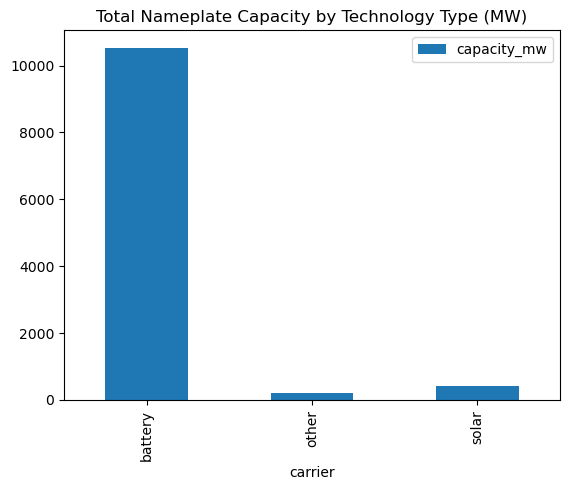

In [81]:
eia_data_operable[['carrier', 'capacity_mw']].groupby('carrier').sum().plot(kind='bar', title='Total Nameplate Capacity by Technology Type (MW)')